<a href="https://colab.research.google.com/github/MK316/workshop22/blob/main/session02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💦 **Session 02** Natural Language Processing

<**Table of Contents**>

1. Text file handing: e.g., reading text files
2. {nltk} package: e.g., tokenize, sentences, stemming, lemmatizing
3. Frequency analysis: e.g., Frequency table
4. POS tagging: e.g., parts of speech (grammatical categories)
5. Collocation, N-gram: e.g., sequences of words
6. Concordance: e.g., words in context
7. Lexical Diversity: e.g., Frequently used TTR measures

📘 [About nltk texts](https://www.nltk.org/book/ch02.html)

##🔰 [1] Text file handling
* Getting texts as Input(), reading/saving files, text length 

Sample text: Aesop fable
[File link](https://raw.githubusercontent.com/MK316/workshop22/main/data/TheHeron.txt)

In [7]:
# 1) Copy and paste text

mytext = input()

A Heron was walking sedately along the bank of a stream, his eyes on the clear water, and his long neck and pointed bill ready to snap up a likely morsel for his breakfast. The clear water swarmed with fish, but Master Heron was hard to please that morning. "No small fry for me," he said. "Such scanty fare is not fit for a Heron. "Now a fine young Perch swam near. "No indeed," said the Heron. "I wouldn't even trouble to open my beak for anything like that!" As the sun rose, the fish left the shallow water near the shore and swam below into the cool depths toward the middle. The Heron saw no more fish, and very glad was he at last to breakfast on a tiny Snail. Do not be too hard to suit or you may have to be content with the worst or with nothing at all. [ ]


In [ ]:
# 2) Assign text as a variable
# \ for line break (this isn't included in the text)
mytext1 = """
A Heron was walking sedately along the bank of a stream, \
his eyes on the clear water, and his long neck and pointed bill ready to snap up a likely morsel for his breakfast. \
The clear water swarmed with fish, but Master Heron was hard to please that morning. \
"No small fry for me," he said. "Such scanty fare is not fit for a Heron. \
"Now a fine young Perch swam near. "No indeed," said the Heron. \
"I wouldn't even trouble to open my beak for anything like that!" \
As the sun rose, the fish left the shallow water near the shore and swam below into the cool depths toward the middle. \
The Heron saw no more fish, and very glad was he at last to breakfast on a tiny Snail. \
Do not be too hard to suit or you may have to be content with the worst or with nothing at all.
"""

In [8]:
# Write text data as file: will save it on Colab

with open('TheHeron.txt', 'w') as file: # 'w' creates a new file
    file.write(mytext) 

In [9]:
# Read text file uploaded on Colab

with open('TheHeron.txt','r') as file: # 'r' reads a file
  text = file.read()
  file.close()
print(text)

A Heron was walking sedately along the bank of a stream, his eyes on the clear water, and his long neck and pointed bill ready to snap up a likely morsel for his breakfast. The clear water swarmed with fish, but Master Heron was hard to please that morning. "No small fry for me," he said. "Such scanty fare is not fit for a Heron. "Now a fine young Perch swam near. "No indeed," said the Heron. "I wouldn't even trouble to open my beak for anything like that!" As the sun rose, the fish left the shallow water near the shore and swam below into the cool depths toward the middle. The Heron saw no more fish, and very glad was he at last to breakfast on a tiny Snail. Do not be too hard to suit or you may have to be content with the worst or with nothing at all. [ ]


In [10]:
# length of string
len(text)

767

In [11]:
# From start to nth string in the text
text[:10]

'A Heron wa'

\> split text by space and join with space

In [12]:
sample = "Hello, I'm learning Python and it has been very fun."

```
⬇️ text.split() #split text by space (punctuation is included)
```

In [13]:
wordlist = sample.split()
print(wordlist)

['Hello,', "I'm", 'learning', 'Python', 'and', 'it', 'has', 'been', 'very', 'fun.']


```
⬇️ ' '.join(text.split())  # combine split words by space 
```

In [14]:
' '.join(wordlist)

"Hello, I'm learning Python and it has been very fun."

##🔰 [2] {nltk} package: Natural Language Toolkit

\- Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

* import {nltk}
* Tokenize by words and sentences
* Split text
* Filtering stopwords


📘 [Source link: webpage](https://realpython.com/nltk-nlp-python/#:~:text=NLTK%2C%20or%20Natural%20Language%20Toolkit,first%20need%20to%20preprocess%20it.)



### **import packages**

📒 Tokenizing by word, Tokenizing by sentence

In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# text with TheHeron.txt (mytext)
print(mytext)

# Tokenize by words and sentences
sents = sent_tokenize(mytext)
words = word_tokenize(mytext)

# Print the results
print('Number of sentences: %d'%len(sents),type(sents))
print('Number of words: %d'%len(words),type(words))

A Heron was walking sedately along the bank of a stream, his eyes on the clear water, and his long neck and pointed bill ready to snap up a likely morsel for his breakfast. The clear water swarmed with fish, but Master Heron was hard to please that morning. "No small fry for me," he said. "Such scanty fare is not fit for a Heron. "Now a fine young Perch swam near. "No indeed," said the Heron. "I wouldn't even trouble to open my beak for anything like that!" As the sun rose, the fish left the shallow water near the shore and swam below into the cool depths toward the middle. The Heron saw no more fish, and very glad was he at last to breakfast on a tiny Snail. Do not be too hard to suit or you may have to be content with the worst or with nothing at all. [ ]
Number of sentences: 11 <class 'list'>
Number of words: 181 <class 'list'>


📒 \> word_tokenize(data)  
punctuations are separate items

In [17]:
sample = "Hello, I'm learning Python and it has been very fun."
samplewords = word_tokenize(sample); samplewords

['Hello',
 ',',
 'I',
 "'m",
 'learning',
 'Python',
 'and',
 'it',
 'has',
 'been',
 'very',
 'fun',
 '.']

📒 \> tokenize with regular expressions
e.g., remove punctuations

In [18]:
from nltk.tokenize import RegexpTokenizer
retokenize =RegexpTokenizer("[\w]+")
words = retokenize.tokenize(sample)
words

['Hello',
 'I',
 'm',
 'learning',
 'Python',
 'and',
 'it',
 'has',
 'been',
 'very',
 'fun']

📒 \> tokenize with regular expressions
e.g., remove punctuations

In [19]:
from nltk.tokenize import RegexpTokenizer
retokenize =RegexpTokenizer("[\w]+")
words = retokenize.tokenize(sample)
words

['Hello',
 'I',
 'm',
 'learning',
 'Python',
 'and',
 'it',
 'has',
 'been',
 'very',
 'fun']

### **Filtering stop words**

Stop words are _**words that you want to ignore,**_ so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [20]:
# import stopwords from nltk.corpus

from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
sample = "Hello, I'm learning Python and it has been very fun."

In [22]:
from nltk.tokenize import RegexpTokenizer
retokenize =RegexpTokenizer("[\w]+")
words = retokenize.tokenize(sample)
words

['Hello',
 'I',
 'm',
 'learning',
 'Python',
 'and',
 'it',
 'has',
 'been',
 'very',
 'fun']

In [23]:
words = [w for w in words if not w in stopwords.words('english')]
print(words)

['Hello', 'I', 'learning', 'Python', 'fun']


In [24]:
 #@markdown 📕 Add new words to the stopword list
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['I']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)

{'won', 'over', "couldn't", 'about', 're', 'mightn', 'because', 'off', 'yourself', 'after', 'above', 'wouldn', 'yours', 'both', 'too', 'mustn', 'theirs', 'during', 'other', 'wasn', 'has', 'itself', 'and', 'she', 'its', 'into', 'can', 'didn', 'again', 'yourselves', 'more', 'your', 'such', "shouldn't", 'below', 'under', 'to', 's', 'are', 'ma', 'for', 'no', 'himself', 'we', 'out', "isn't", "you'll", 'having', "hasn't", 'did', 'shouldn', 'shan', 'ain', 'once', 'y', 'i', 'hadn', 'were', 'a', 'most', 'them', 'which', 'as', 'at', 'same', 'whom', "that'll", 'being', 'haven', 'not', 'of', "it's", 'only', "mustn't", "shan't", 'you', 'the', 'myself', 'doing', 'how', 'very', 'him', 'until', 'isn', 'that', 'against', 'each', 'couldn', 'be', 'weren', 'on', 'll', 'hasn', 'few', 'by', 'just', 'was', 'his', 'up', 'or', 'an', 'before', 'some', 'ours', 'd', 'than', 'should', 'hers', 'why', 'o', "won't", 'am', "wasn't", "didn't", 'if', 'it', 'herself', 'these', 'but', 'through', 'from', 'nor', "should've"

In [25]:
#@markdown Tokenized words after filtering new stop words:

words = [w for w in words if not w in new_stopwords_list]
print(words)

['Hello', 'learning', 'Python', 'fun']


### **Stemming & Lemmatizing**

"Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used." [source link](https://realpython.com/nltk-nlp-python/)

* Stemming: am ➜ am, having ➜ hav, the going ➜ the go
* Lemmatizing: (am ➜ be or am), having ➜ have, the going ➜ the going

📗 **PorterStemmer**

In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

In [27]:
sample = "Good morning. Helping others is one of the greatest things that humans can do."

In [28]:
words = word_tokenize(sample)
words = [w for w in words if len(w) > 1] # punctuation only items are removed.
print(words)

['Good', 'morning', 'Helping', 'others', 'is', 'one', 'of', 'the', 'greatest', 'things', 'that', 'humans', 'can', 'do']


In [29]:
stemmed_words = [stemmer.stem(w) for w in words]
stemmed_words
# Problems: morning > morn

['good',
 'morn',
 'help',
 'other',
 'is',
 'one',
 'of',
 'the',
 'greatest',
 'thing',
 'that',
 'human',
 'can',
 'do']

📗 **LancasterStemmer**

In [30]:
from nltk.stem import LancasterStemmer
Lstemmer = LancasterStemmer()

In [31]:
stemmed_words = [Lstemmer.stem(w) for w in words]
stemmed_words
# Problems: morning > morn, others > oth

['good',
 'morn',
 'help',
 'oth',
 'is',
 'on',
 'of',
 'the',
 'greatest',
 'thing',
 'that',
 'hum',
 'can',
 'do']

📗 **WordNetLemmatizer**

In [32]:
sample = "I am learning Python."
words = word_tokenize(sample)

In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

Wstemmer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [34]:
Wlemmatized_words = [Wstemmer.lemmatize(w) for w in words]
Wlemmatized_words

# morning, others > okay!

['I', 'am', 'learning', 'Python', '.']

📗 **Snowball stemmer**

In [35]:
import nltk
snow = nltk.stem.SnowballStemmer('english')
lanca = nltk.stem.LancasterStemmer()
porter = nltk.stem.PorterStemmer()
wordnet = nltk.WordNetLemmatizer()

## Stemmer comparison

In [36]:
#@markdown 🚩 Stemmer, Lemmatizer comparison: Snow(S), Lancaster(S), Porter(S), WordNet(L) 
def stemming(x):
  print('Snow (S): ', snow.stem(x))
  print('Lancaster (S): ',lanca.stem(x))
  print('Porter (S): ', porter.stem(x))
  print('WordNet (L): ', wordnet.lemmatize(x))

word = input()
stemming(word)

going
Snow (S):  go
Lancaster (S):  going
Porter (S):  go
WordNet (L):  going


---
##🔰 [3] Frequency distribution

### **Frequency information of words**

"The word frequency effect refers to the observation that high-frequency words are processed more efficiently than low-frequency words." [source link](https://journals.sagepub.com/doi/10.1177/0963721417727521)

* Getting word frequency
* Save frequency table as csv format

💾  [text link](https://raw.githubusercontent.com/MK316/workshop22/main/data/TheHeron.txt)

In [37]:
# Prepare text to analyze: copy the text from the link above and paste it in the box
mytext = input()
words = retokenize.tokenize(mytext)

going to school


💎 **Wordcloud**

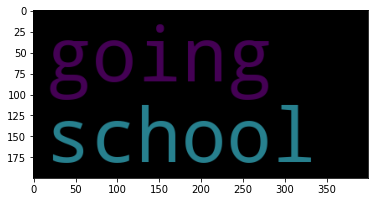

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(mytext) 
plt.imshow(wc)

💎 **Frequency distribution**

In [39]:
# Frequency distribution
fd = nltk.FreqDist(words).most_common(10)
fd

[('going', 1), ('to', 1), ('school', 1)]

💎 **Frequency plot**

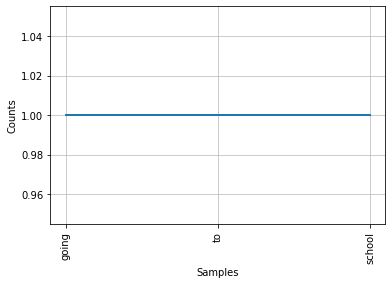

In [40]:
nltk.Text(words).plot(10)

💎 **Dispersion plot (keywords)**

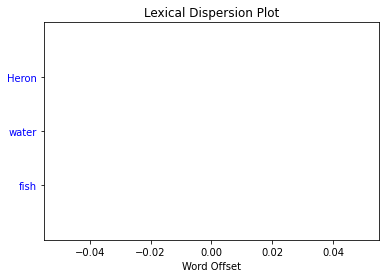

In [41]:
#Dispersion plot of keywords:

nltk.Text(words).dispersion_plot(['Heron','water','fish'])

### 💎 Enlgish Dictionary

Length: 235,886

In [42]:
nltk.download('words')
dictionary = nltk.corpus.words.words('en')

dictionary[-10:-1] #(last 10 words)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [43]:
print(len(dictionary))
print(type(dictionary))

235886
<class 'list'>


In [44]:
# Longest words in dictionary:

res = max(dictionary, key = len)
print(len(res))
res

24


'formaldehydesulphoxylate'

In [45]:
# Random word sample from dictionary
import random

random.sample(dictionary,5)

['Santalaceae', 'gazzetta', 'semivocal', 'Plutarchical', 'Chlorellaceae']

💎 **Regular Expression** {re}

[Learn regular expression](https://www.w3schools.com/python/python_regex.asp)

In [46]:
# Extracting words that meet conditions using regular expression
import re

result = [w for w in dictionary if len(w) == 24]; result
result = [w for w in dictionary if re.search('ed$',w)]; print(len(result))
result = [w for w in dictionary if re.search('ches$',w)]; print(result)
result = [w for w in dictionary if re.search('^[a, e, i, o, u, y].+',w)]; print(result[-10:-1])

9192
['arches', 'breeches', 'carritches', 'cratches', 'gramoches', 'laches', 'leeches', 'Leiotriches', 'Lissotriches', 'Nachitoches', 'Natchitoches', 'overriches', 'riches', 'scratches', 'Ulotriches']
['yuletide', 'yummy', 'yungan', 'yurt', 'yurta', 'yus', 'yusdrum', 'yutu', 'yuzlik']


##🔰 [4] POS tagging (Part of Speech)

* English text Tagging using the Corpus Toolkit [by Kristopher Kyle]("https://github.com/kristopherkyle/corpus_toolkit")

---

For a given text, we'll add POS tag to the text.  
📍 install {corpus-toolkit}

In [47]:
%%capture
!pip install corpus-toolkit

### **Step#1** Create a folder named 'txtdata'
=> Corpus Toolkit processes files under a specified folder. So we create a folder and upload files in the given folder.

In [48]:
import os
os.mkdir("txtdata")

### **Step#2** File upload (on colab) under the 'txtdata' folder:
e.g., DoveAndAnt.txt
https://raw.githubusercontent.com/MK316/mynltkdata/main/data/DoveAndAnt.txt

### Check current directory & change current directory if needed:

---
Current data location: /content/txtdata/DoveAndAnt.txt

Current directory should be '/content'


In [49]:
!pwd
# %cd /content/

/content


In [50]:
from corpus_toolkit import corpus_tools as ct

brown_corp = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(brown_corp)  #tokenize corpus - by default this lemmatizes as well
brown_freq = ct.frequency(tok_corp) #creates a frequency dictionary

No files found. There may be a problem with your working directory or your file search term.


### **Step#3** Write a tagged file under '/content/tagged_txt'


In [51]:
# tagged_txt (tagged data folder), txtdata (original data folder)
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

No files found. There may be a problem with your working directory or your file search term.


In [52]:
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

In [53]:
type(tagged_freq) # dict

dict

### **Step#4** Save Tagged_freq as Data frame

In [54]:
import pandas as pd

In [55]:
data_dict = tagged_freq
data_items = data_dict. items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
print(df)

Empty DataFrame
Columns: []
Index: []


### **Step#5** Write a tagged frequency dataframe to a csv file (on Colab)

In [56]:
df.to_csv(r'/content/tagged.csv', index=False)

In [68]:
data = pd.read_csv('tagged.csv')
data

EmptyDataError: ignored

##🔰 [5] Collocation, N-grams

**Collocations:** these are phrases or expressions containing sequences of words, that are highly likely to co-occur. 

* For example — 'social media', national holiday', 'deep learning', 'Walt Disney', etc.

**N-grams:** Traditionally, we can use n-grams to generate language models to predict which word comes next given a history of words. {nltk.lm}

In [59]:
# Corpus to download: 'gutenberg' (18 texts: novels, bible)
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [60]:
text = nltk.corpus.gutenberg.raw('austen-sense.txt')
words = retokenize.tokenize(text)
print(len(words))

120787


In [61]:
nltk.Text(words).collocations()

Mrs Jennings; Colonel Brandon; Sir John; Lady Middleton; Mrs Dashwood;
Mrs Ferrars; Miss Dashwood; every thing; thousand pounds; dare say;
Miss Steeles; Mrs Palmer; Miss Steele; said Elinor; every body; John
Dashwood; great deal; Harley Street; Berkeley Street; Miss Dashwoods


[sample text:](https://raw.githubusercontent.com/MK316/workshop22/main/data/TheHeron.txt) Copy and paste below

In [62]:
text = input()
words1 = retokenize.tokenize(text)

A Heron was walking sedately along the bank of a stream, his eyes on the clear water, and his long neck and pointed bill ready to snap up a likely morsel for his breakfast. The clear water swarmed with fish, but Master Heron was hard to please that morning. "No small fry for me," he said. "Such scanty fare is not fit for a Heron. "Now a fine young Perch swam near. "No indeed," said the Heron. "I wouldn't even trouble to open my beak for anything like that!" As the sun rose, the fish left the shallow water near the shore and swam below into the cool depths toward the middle. The Heron saw no more fish, and very glad was he at last to breakfast on a tiny Snail. Do not be too hard to suit or you may have to be content with the worst or with nothing at all. [ ]


In [63]:
nltk.Text(words1).collocations()

clear water


###🚩 **N-grams**

_**Why is it that we need to learn n-gram and the related probability?**_

\- In Natural Language Processing, or NLP for short, n-grams are used for a variety of things. Some examples include auto completion of sentences, auto spell check, and to a certain extent, we can check for grammar in a given sentence. 

In [71]:
#@markdown 🚩 (1) Let's try with a new function: ngram(x, y) x = ngram number, y = show top yth ngrams
import nltk
nltk.download('gutenberg')
from nltk.tokenize import word_tokenize
from nltk import ngrams

def ngram(x,y):

  # ngram_num = input()
  # ngram_num = int(ngram_num)

  text_to_choose = "bible-kjv.txt"  #@param ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
  # ngram_number = "6" #@param [2, 3, 4, 5, 6, 7]
  # n = int(ngram_number)
  # show_nth_in_frequency_list = "5" #@param [5, 10, 15, 20]
  # n1 = int(show_nth_in_frequency_list)

  text = nltk.corpus.gutenberg.raw(text_to_choose)
  ngram = ngrams(text.split(),x)
  gramdata = []

  for grams in ngram:
    gramdata.append(grams)
  print(len(gramdata))

  # fd = nltk.FreqDist(gramdata).most_common(int(y))
  return gramdata

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


🚩 (2) Getting results using ngram(x,y)

In [72]:
ngram(5,6) # fivegram result, show top 10 most common fivegram

821129


[('[The', 'King', 'James', 'Bible]', 'The'),
 ('King', 'James', 'Bible]', 'The', 'Old'),
 ('James', 'Bible]', 'The', 'Old', 'Testament'),
 ('Bible]', 'The', 'Old', 'Testament', 'of'),
 ('The', 'Old', 'Testament', 'of', 'the'),
 ('Old', 'Testament', 'of', 'the', 'King'),
 ('Testament', 'of', 'the', 'King', 'James'),
 ('of', 'the', 'King', 'James', 'Bible'),
 ('the', 'King', 'James', 'Bible', 'The'),
 ('King', 'James', 'Bible', 'The', 'First'),
 ('James', 'Bible', 'The', 'First', 'Book'),
 ('Bible', 'The', 'First', 'Book', 'of'),
 ('The', 'First', 'Book', 'of', 'Moses:'),
 ('First', 'Book', 'of', 'Moses:', 'Called'),
 ('Book', 'of', 'Moses:', 'Called', 'Genesis'),
 ('of', 'Moses:', 'Called', 'Genesis', '1:1'),
 ('Moses:', 'Called', 'Genesis', '1:1', 'In'),
 ('Called', 'Genesis', '1:1', 'In', 'the'),
 ('Genesis', '1:1', 'In', 'the', 'beginning'),
 ('1:1', 'In', 'the', 'beginning', 'God'),
 ('In', 'the', 'beginning', 'God', 'created'),
 ('the', 'beginning', 'God', 'created', 'the'),
 ('beg

##🔰 [6] Concordance

words in context

In [ ]:
nltk.Text(words).concordance('Jennings',130,10)

Displaying 10 of 230 matches:
two entire strangers of the party and wished for no more Mrs Jennings Lady Middleton s mother was a good humoured merry fat elderl
pain than could arise from such common place raillery as Mrs Jennings s Colonel Brandon the friend of Sir John seemed no more adap
 be his friend than Lady Middleton was to be his wife or Mrs Jennings to be Lady Middleton s mother He was silent and grave His ap
advanced state of life which humanity required CHAPTER 8 Mrs Jennings was a widow with an ample jointure She had only two daughter
 an excellent match for HE was rich and SHE was handsome Mrs Jennings had been anxious to see Colonel Brandon well married ever si
 to the youthful fancy of her daughter ventured to clear Mrs Jennings from the probability of wishing to throw ridicule on his age
ly ill natured Colonel Brandon is certainly younger than Mrs Jennings but he is old enough to be MY father and if he were ever ani
 though unwillingly to believe that the sentiments wh

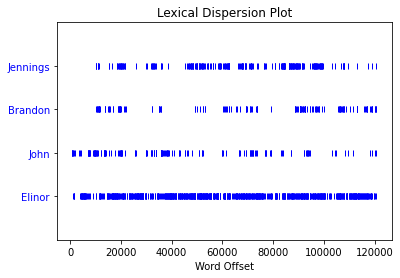

In [ ]:
nltk.Text(words).dispersion_plot(['Jennings','Brandon','John','Elinor'])

In [ ]:
fd = nltk.FreqDist(words).most_common(10)
fd

[('to', 4063),
 ('the', 3861),
 ('of', 3565),
 ('and', 3350),
 ('her', 2436),
 ('a', 2043),
 ('I', 2004),
 ('in', 1904),
 ('was', 1846),
 ('it', 1568)]

##🔰 [7] Lexical Diversity Assessments:
Keywords: **TTR (Type-to-Token Ratio), MTLD, vocd-D,** and **HD-D**

**[Notes]** 
1. The lexical diversity indices here refer to the following article:

* [McCarthy, P.M., Jarvis, S.]("https://link.springer.com/article/10.3758/BRM.42.2.381") (2010). MTLD, vocd-D, and HD-D: A validation study of sophisticated approaches to lexical diversity assessment. Behavior Research Methods 42, 381–392. https://doi.org/10.3758/BRM.42.2.381

2. The Python coding here uses [Kristopher Kyle's {lexical-diversity} package]("https://github.com/kristopherkyle/lexical_diversity").

3. TTR, Log TTR, RootTTR etc: These measures have been criticized since they are heavily influenced by text length. (Tweedie & Baayen, 1998; Chipere et al., 2004; Kettunen, 2014) Thus, researchers should use matrics such as MTLD, HDD, MASS, etc



### **Step#1** Intalling {lexical-diversity} packages:

In [ ]:
%%capture
pip install lexical-diversity

In [ ]:
from lexical_diversity import lex_div as ld

### **Step#2** Bring your texts to be analyzed:

Text upload: Copy the text following the link and past it when asked.

[Text1 to copy](https://raw.githubusercontent.com/MK316/workshop22/main/data/RE.Ch01.txt)

In [ ]:
#1# Copy and paste the text directly in the cell:

text1 = input()

The visual village  Before the age of the smartphone, aspiring photographers had to learn how to use high-tech cameras and photographic techniques. Not everyone had cameras, and it took skill and a good eye to capture and create a great photograph. Today, with the huge range of camera apps on our smartphones, we are all amateur photographers. And pretty good ones, too: The quality of smartphone images now nearly equals that of digital cameras. The new ease of photography has given us a tremendous appetite for capturing the magical and the ordinary. We are obsessed with documenting everyday moments, whether it’s a shot of our breakfast, our cat – or our cat’s breakfast. And rather than collect pictures in scrapbooks, we share, like, and comment on them with friends and strangers around the globe. Even photojournalists are experimenting with cell phones because their near invisibility makes it easier to capture unguarded media. They can now act as their own publishers – reaching huge aud

[Text2 to copy](https://raw.githubusercontent.com/MK316/workshop22/main/data/RE.Ch02.txt)

In [ ]:
text2 = input()

Living light  The ability of some species to create light, known as bioluminescence, is both magical and commonplace. Magical, because of its glimmering beauty. Commonplace, because many life forms can do it. On land the most familiar examples are fireflies, flashing to attract mates on a warm summer night. But there are other luminous land organisms, including glow-worms, millipedes, and some ninety species of fungus. Even some birds, such as the Atlantic puffin, have beaks that glow in the dark. But the real biological light show takes place in the sea. Here, an astonishing number of beings can make light. Some, such as ostracods, are like ocean fireflies, using flashes of light to attract mate. There are also glowing bacteria, and light-making fish, squid, and jellyfish. Indeed, of all the groups of organisms known to make light, more than four-fifths live in the ocean. As a place to live, the ocean has a couple of peculiarities. Firstly, there is almost nowhere to hide, so being in

In [ ]:
tleng1 = len(text1); print('Text length: ',tleng1)
tleng2 = len(text2); print('Text length: ',tleng2)

Text length:  4755
Text length:  3382


In [ ]:
tok1 = ld.tokenize(text1); tok2 = ld.tokenize(text2)
tok1 = [w for w in tok1 if len(w) >1]; tok2 = [w for w in tok2 if len(w) >1]
print('First 10 tokenized words in text1:', tok1[:10])
print('First 10 tokenized words in text2:', tok2[:10])

First 10 tokenized words in text1: ['the', 'visual', 'village', 'before', 'the', 'age', 'of', 'the', 'smartphone', 'aspiring']
First 10 tokenized words in text2: ['living', 'light', 'the', 'ability', 'of', 'some', 'species', 'to', 'create', 'light']


In [ ]:
flt1 = ld.flemmatize(text1)
flt2 = ld.flemmatize(text2)

### **[0] TTR:** This measure is sensitive to the length of a text.

### Lexical Diversity indices:

* TTR (Type-Token ratio) = Type / Token: 

e.g., unique words = 400, Token = 1,000
TTR = 400 / 1,000 = 0.4

- It is a measure of vocabulary ***variation*** within a written text or a speech

- The closer the TTR ratio is to 1, the greater the lexical richness of the segment.

* Note: TTR values vary in accordance with the length of the text. That is, TTR’s are not comparable unless they are based on texts of the same length. 

=> STTR (Standardized TTR): You can get an average type/token ratio based on consecutive 1,000-word chunks of text. (Texts with less than 1,000 words will get a standardised type/token ratio of 0.)

References
Johnson (1939) Language and Speech Hygiene: an Application of General Semantics: Outline of a Course (Chicago).

In [ ]:
ttr1 = ld.ttr(flt1)
ttr2 = ld.ttr(flt2)
print(ttr1, ttr2)

0.42258883248730966 0.45689655172413796


### [1] **MTLD**: the Measure of Textual Lexical Diversity

* The index for this approach is calculated as the mean length of word strings that maintain a criterion level of lexical variation.

* This index is not found to vary as a function of text length. (McCarthy, 2010)

"... MTLD is obtained by dividing the total number of words by
the total number of factors. Thus, if the text is 360 words long and there are 4 factors, the MTLD value is 90. ... The final version of MTLD is obtained by running the programme
forward and backward through the data and calculating an average of the outcome of both. According to McCarthy (2005) and Crossley et al. (2009), MTLD does not vary as a function of text length for text segments whose length is in the
100–2,000-word range." excerpt from [Treffers-Daller, J. (2013)]("https://centaur.reading.ac.uk/28712/1/04ch3.pdf") Measuring lexical diversity among L2
learners of French: an exploration of the validity of D, MTLD
and HD-D as measures of language ability. In: Jarvis, S. and
Daller, M. (eds.) Vocabulary knowledge: human ratings and
automated measures. Benjamins, Amsterdam, pp. 79-104.
ISBN 9789027241887 Available at
http://centaur.reading.ac.uk/28712/

In [ ]:
tleng1 = len(text1); print('Text length: ',tleng1)
tleng2 = len(text2); print('Text length: ',tleng2)

Text length:  4755
Text length:  3382


In [ ]:
tok1 = ld.tokenize(text1); tok2 = ld.tokenize(text2)
tok1 = [w for w in tok1 if len(w) >1]; tok2 = [w for w in tok2 if len(w) >1]
print('First 10 tokenized words in text1:', tok1[:10])
print('First 10 tokenized words in text2:', tok2[:10])

First 10 tokenized words in text1: ['the', 'visual', 'village', 'before', 'the', 'age', 'of', 'the', 'smartphone', 'aspiring']
First 10 tokenized words in text2: ['living', 'light', 'the', 'ability', 'of', 'some', 'species', 'to', 'create', 'light']


In [ ]:
flt1 = ld.flemmatize(text1)
flt2 = ld.flemmatize(text2)

In [ ]:
mtld1 = ld.mtld(flt1); print("MTLD index: %d"%mtld1)
mtld2 = ld.mtld(flt2); print("MTLD index: %d"%mtld2)

MTLD index: 102
MTLD index: 82


### **[2] HD-D**(or vocd-D): Hypergeometric distribution D
* HD-D is a viable alternative to the vocd-D standard.

In [ ]:
hdd1 = ld.hdd(flt1); print('HD-D index: ',hdd1)
hdd2 = ld.hdd(flt2); print('HD-D index: ',hdd2)

HD-D index:  0.8531322110810644
HD-D index:  0.8330696824693796


### **[3] MASS**:

* Three of the indices — MTLD, vocd-D (or HD-D), and Maas—appear to capture unique lexical information. 

In [ ]:
mass1 = ld.maas_ttr(flt1); print('MASS index: ', mass1)
mass2 = ld.maas_ttr(flt2); print('MASS index: ', mass2)

MASS index:  0.04458737093343894
MASS index:  0.044546663099875504


### Result summary

In [ ]:
# result table

df = pd.DataFrame()

df['Text'] = ['Text1','Text2']
df['Length'] = [tleng1, tleng2]
df['TTR'] = [ttr1, ttr2]
df['MTLD'] = [round(mtld1,2), round(mtld2,2)]
df['HDD'] = [round(hdd1,4), round(hdd2,4)]
df['MASS'] = [round(mass1,4), round(mass2,4)]

df

,Text,Length,TTR,MTLD,HDD,MASS
0,Text1,4755,0.422589,102.14,0.8531,0.0446
1,Text2,3382,0.456897,82.86,0.8331,0.0445
